In [50]:
import tensorflow as tf
from tensorflow.python import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils

In [51]:
# Generating images for the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Generating images for the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

# Creating the Training set
training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 10,
                                                 class_mode = 'binary')

Found 249 images belonging to 2 classes.


In [52]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        #accuracy at which training should stop
        accu = 0.98 
        if(logs.get('accuracy')>accu):
            print("\nReached ",(accu*100),"% accuracy so cancelling training!")
            self.model.stop_training = True
            
callbacks = myCallback()

In [53]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 64x64 with 3 bytes color
    # This is the convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               1606144   
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [55]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [56]:
model.fit(training_set, epochs = 10, callbacks=[callbacks])

Epoch 1/10
25/25 [==============================] - 21s 851ms/step - loss: 0.7798 - accuracy: 0.6064
Epoch 2/10
25/25 [==============================] - 22s 867ms/step - loss: 0.5706 - accuracy: 0.7108
Epoch 3/10
25/25 [==============================] - 21s 855ms/step - loss: 0.4702 - accuracy: 0.8193
Epoch 4/10
25/25 [==============================] - 22s 865ms/step - loss: 0.3751 - accuracy: 0.8594
Epoch 5/10
25/25 [==============================] - 22s 865ms/step - loss: 0.3836 - accuracy: 0.8313
Epoch 6/10
25/25 [==============================] - 22s 873ms/step - loss: 0.3663 - accuracy: 0.8394
Epoch 7/10
25/25 [==============================] - 21s 840ms/step - loss: 0.3068 - accuracy: 0.9157
Epoch 8/10
25/25 [==============================] - 22s 874ms/step - loss: 0.2815 - accuracy: 0.8835
Epoch 9/10
25/25 [==============================] - 21s 857ms/step - loss: 0.2607 - accuracy: 0.9157
Epoch 10/10
25/25 [==============================] - 21s 853ms/step - loss: 0.2609 - accura

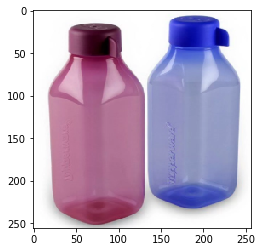

In [57]:
img_p = 'test4.jpg'
img = cv2.imread(img_p, cv2.IMREAD_COLOR)
img = cv2.resize(img, (256,256))
plt.imshow(img)

In [58]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('test4.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
if result == 1:
    print('Square')
else:
    print('Curved')

Square


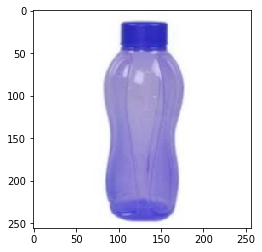

In [63]:
img_p = 'test3.jpg'
img = cv2.imread(img_p, cv2.IMREAD_COLOR)
img = cv2.resize(img, (256,256))
plt.imshow(img)

In [62]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('test3.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
if result == 1:
    print('Square')
else:
    print('Curved')

Curved


In [17]:
from imageai.Detection import ObjectDetection
import os
import tensorflow.python.keras.backend as K
sess = K.get_session()
execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( os.path.join(execution_path , "resnet50_coco_best_v2.0.1.h5"))
detector.loadModel()
detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , "test2.jpg"), output_image_path=os.path.join(execution_path , "image2new.jpg"), minimum_percentage_probability=30)

for eachObject in detections:
    print(eachObject["name"] , " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"] )
    print("--------------------------------")

tracking <tf.Variable 'Variable_10:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_11:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_12:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_13:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_14:0' shape=(9, 4) dtype=float32> anchors
bottle  :  93.3280348777771  :  [51, 69, 202, 449]
--------------------------------
bottle  :  93.8289999961853  :  [240, 70, 390, 459]
--------------------------------
vase  :  42.52731502056122  :  [54, 62, 194, 449]
--------------------------------
vase  :  30.060413479804993  :  [230, 52, 385, 446]
--------------------------------
